In [12]:
# STEP_2: Importing Required Libraries

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

In [13]:
# STEP_3: Project Definition
'''For this project, we need to load the Melbourne Housing dataset into our project. The quality and amount of data we collect will determine how good our predictive model
can be. For this reason, we need to examine the dataset very carefully. We will estimate the price of a house using the Melbourne Housing dataset, which is a
real-life example. Before evaluating any cost, we will start by analyzing the data using preprocessing techniques. We will then build our models and measure their
performance to complete the project'''


'For this project, we need to load the Melbourne Housing dataset into our project. The quality and amount of data we collect will determine how good our predictive model\ncan be. For this reason, we need to examine the dataset very carefully. We will estimate the price of a house using the Melbourne Housing dataset, which is a\nreal-life example. Before evaluating any cost, we will start by analyzing the data using preprocessing techniques. We will then build our models and measure their\nperformance to complete the project'

In [14]:
# STEP_4: Gathering and Observing Data
# Load the dataset to the project with the help of read_csv() and observe the first 5 columns
dataset = pd.read_csv('Melbourne_housing_FULL.csv')
print(f"{'-' * 50}\nFirst 5 rows of dataset:\n{dataset.head()}")
# Find the shape, number of columns and size of the dataset
print(f"Shape of dataset:\n{dataset.shape}")
print(f"{'-' * 50}\nNumber of columns:\n{dataset.shape[1]}")
print(f"{'-' * 50}\nSize of dataset:\n{dataset.size}")

# Show the information of the dataset, which contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values)
print(f"{'-' * 50}\nInformation of dataset:\n{dataset.info}")
print(f"{'-' * 50}\nColumn labels are:\n{dataset.columns}")
print(f"{'-' * 50}\nColumn data types are:\n{dataset.dtypes}")
print(f"{'-' * 50}\nMemory usage:\n{dataset.memory_usage()}")
print(f"{'-' * 50}\nRange index:\n{dataset.index}")
print(f"{'-' * 50}\nNumber of non-null cells in each column:\n{dataset.count()}")
print(f"{'-' * 50}\nNumber of unique values in each column:\n{dataset.nunique()}")

--------------------------------------------------
First 5 rows of dataset:
       Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford       68 Studley St      2    h        NaN     SS  Jellis   
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/09/2016       2.5    3067.0  ...       1.0  1.0     126.0           NaN   
1  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
2  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
3  4/02/2016       2.5    3067.0  ...       2.0  1.0       0.0           NaN   
4  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         15

--------------------------------------------------
Descriptive statistics:
              Rooms         Price      Distance      Postcode      Bedroom2  \
count  34857.000000  2.724700e+04  34856.000000  34856.000000  26640.000000   
mean       3.031012  1.050173e+06     11.184929   3116.062859      3.084647   
std        0.969933  6.414671e+05      6.788892    109.023903      0.980690   
min        1.000000  8.500000e+04      0.000000   3000.000000      0.000000   
25%        2.000000  6.350000e+05      6.400000   3051.000000      2.000000   
50%        3.000000  8.700000e+05     10.300000   3103.000000      3.000000   
75%        4.000000  1.295000e+06     14.000000   3156.000000      4.000000   
max       16.000000  1.120000e+07     48.100000   3978.000000     30.000000   

           Bathroom           Car       Landsize  BuildingArea     YearBuilt  \
count  26631.000000  26129.000000   23047.000000   13742.00000  15551.000000   
mean       1.624798      1.728845     593.598993     

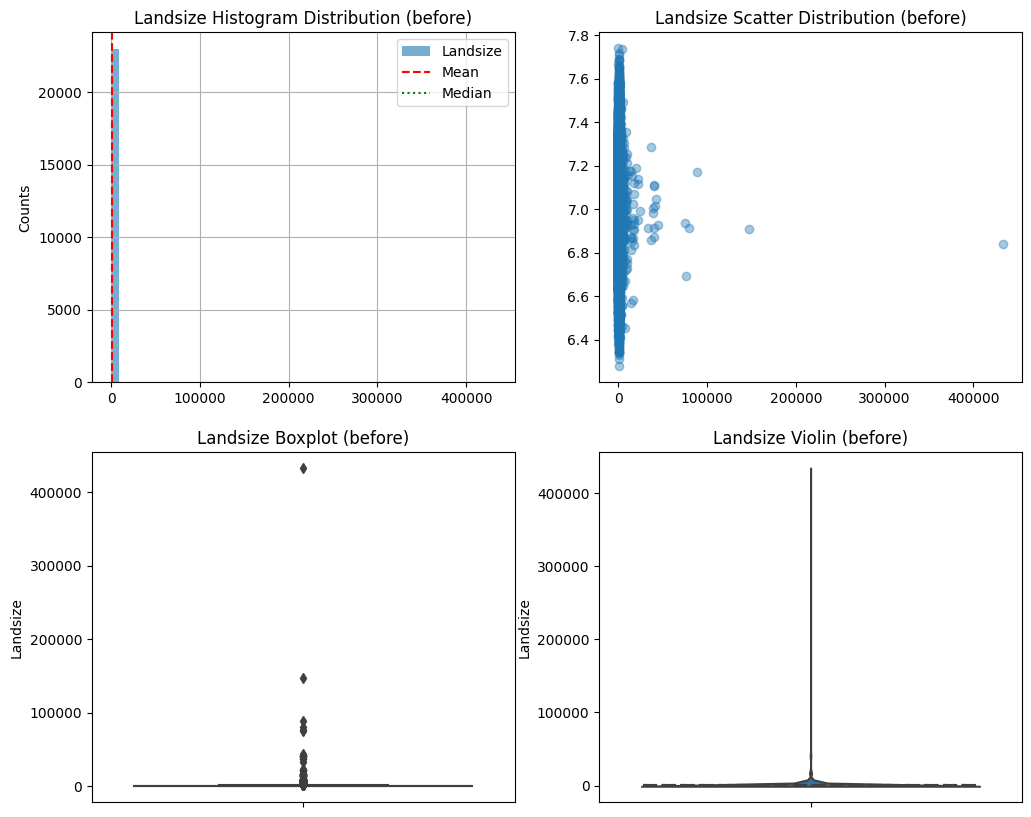

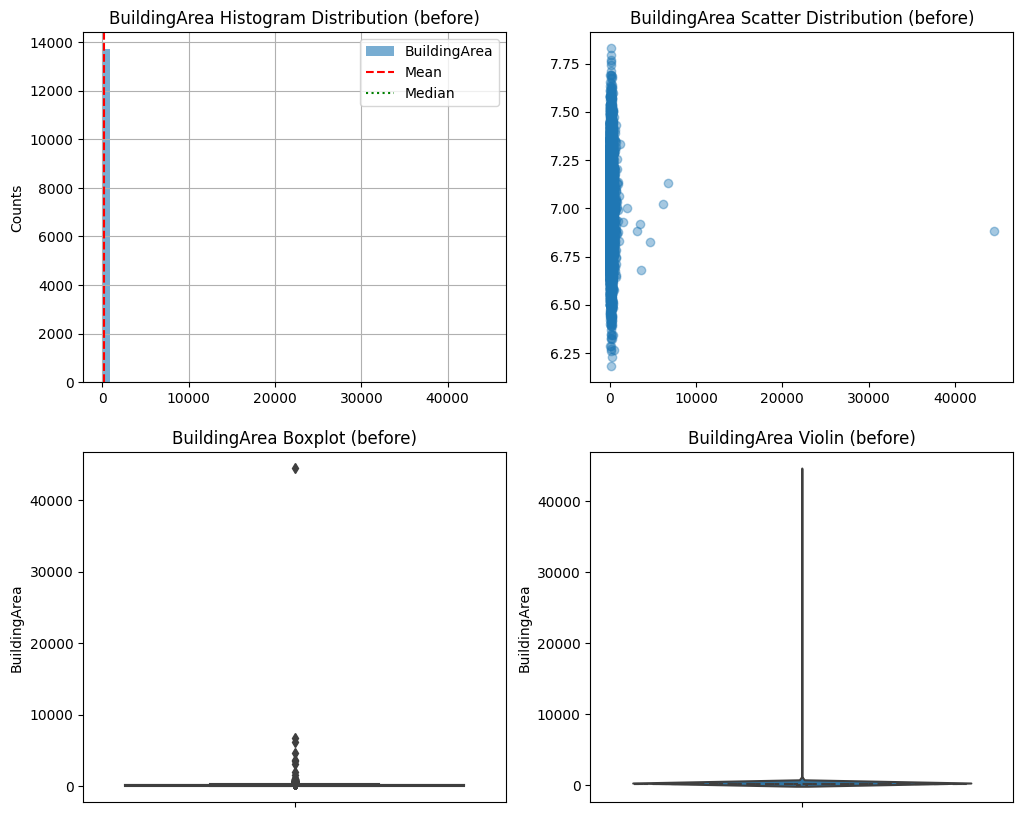

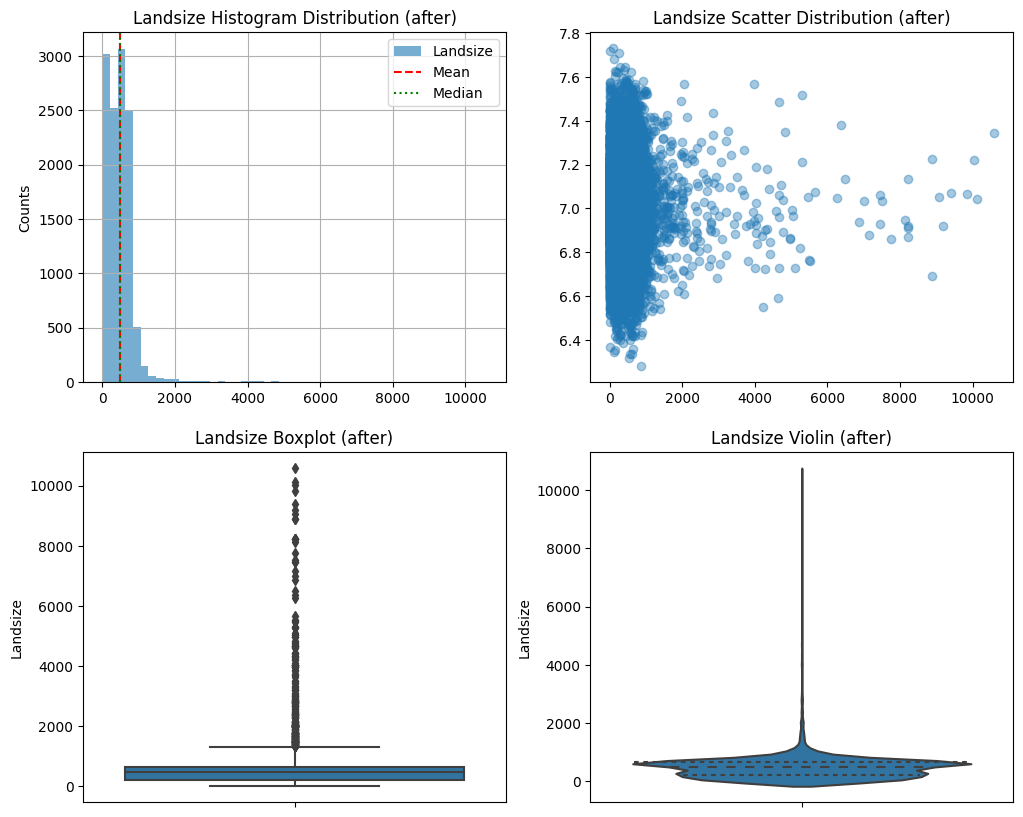

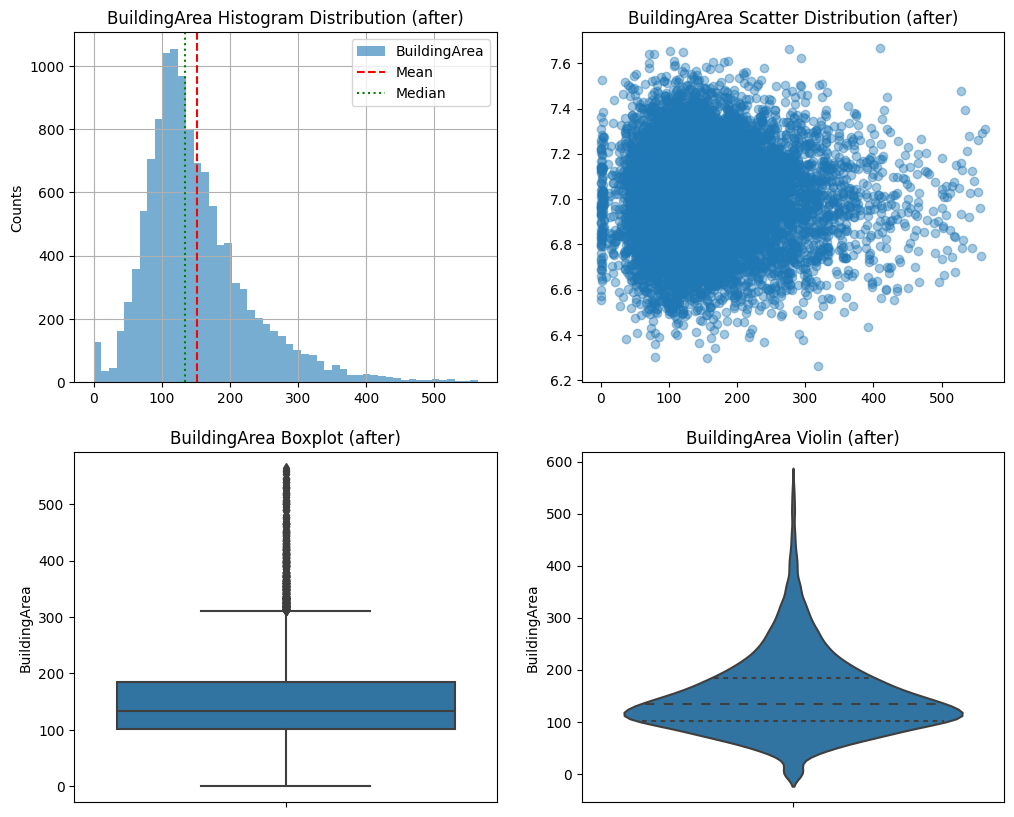

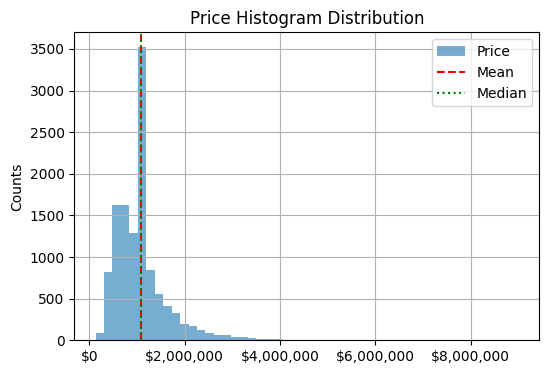

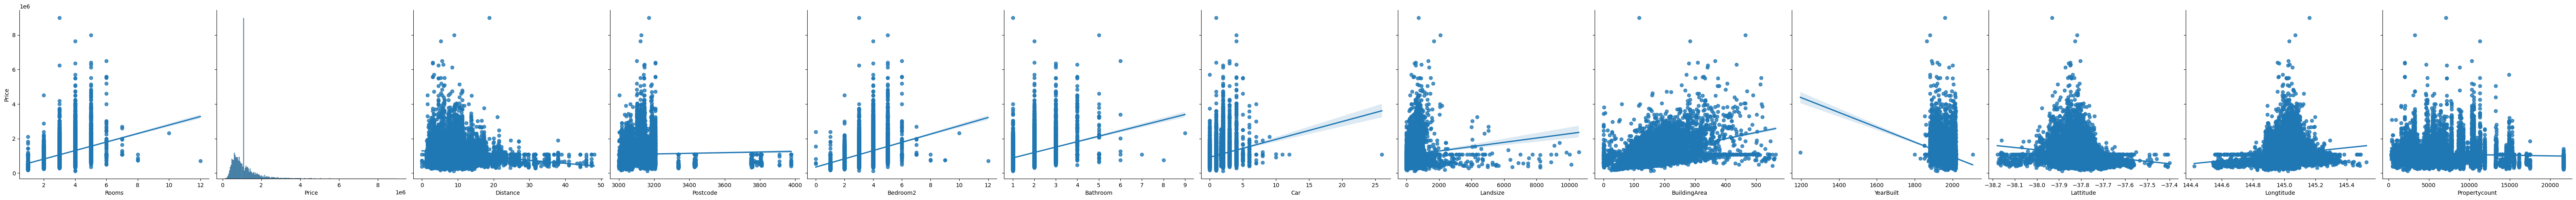

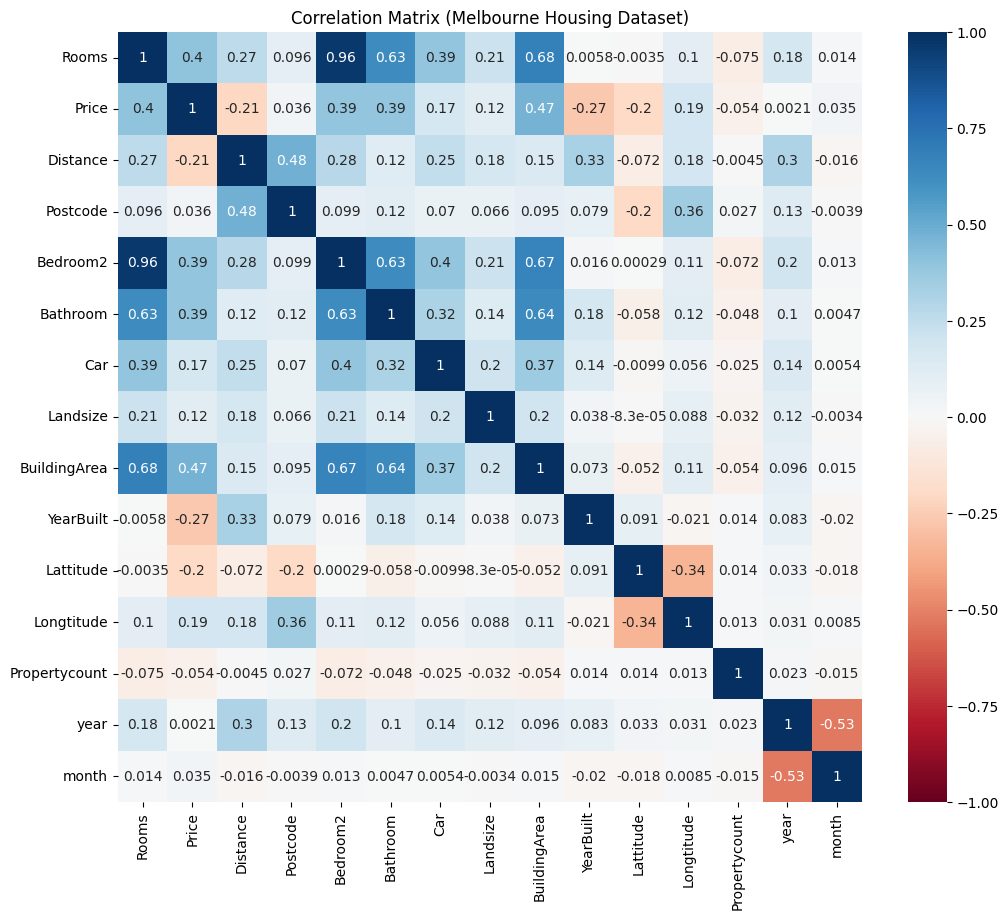

In [15]:

# STEP_5 : Exploratory Data Analysis
# Examine the descriptive statistics of the dataset
print(f"{'-' * 50}\nDescriptive statistics:\n{dataset.describe()}")

def create_plots(column_name, filename_suffix):
    plt.figure(figsize=(12, 10))
    plt.subplot(2, 2, 1)
    dataset[column_name].hist(bins=50, label=column_name, alpha=0.6)
    plt.axvline(np.mean(dataset[column_name]), ls='--', c='r', label="Mean")
    plt.axvline(np.median(dataset[column_name]), ls=':', c='g', label="Median")
    plt.ylabel("Counts")
    plt.title(f"{column_name} Histogram Distribution ({filename_suffix})");
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.scatter(dataset[column_name], np.random.normal(7, 0.2, size=dataset.shape[0]), alpha=0.4)
    plt.title(f"{column_name} Scatter Distribution ({filename_suffix})");

    plt.subplot(2, 2, 3)
    sns.boxplot(y=column_name, data=dataset)
    plt.title(f"{column_name} Boxplot ({filename_suffix})");

    plt.subplot(2, 2, 4)
    sns.violinplot(y=column_name, data=dataset, inner="quartile", bw_method=0.2)
    plt.title(f"{column_name} Violin ({filename_suffix})");

    #save the plot as png file
    plt.savefig(f'{column_name}_{filename_suffix}.png')

create_plots("Landsize", "before")
create_plots("BuildingArea", "before")

# Full date has no meaning for the model. So we will create new columns for year and month separately
dataset['year'] = pd.to_datetime(dataset['Date'], dayfirst=True).dt.year
dataset['month'] = pd.to_datetime(dataset['Date'], dayfirst=True).dt.month
dataset.drop(columns=['Date', 'Suburb'], inplace=True)

# Address information is not really meaningful for the model. So we will drop this column
dataset.drop('Address', axis=1, inplace=True)

numerical_cols = dataset.select_dtypes(exclude='object').columns.to_list()
# Remove the year and month columns from the numerical_cols list. They should also be considered as categorical columns
numerical_cols.remove('year')
numerical_cols.remove('month')

# The values of some variables are given as objects. At the same time, we observe that there are also categorical values. This might give us trouble when examining the dataset. Therefore, in such cases, we need to define the variables categorically.
object_columns = dataset.select_dtypes(include='object').columns.to_list()
categorical_columns = object_columns.copy()
categorical_columns.extend(['year', 'month'])

# Check for duplicate data. If there are duplicate data, clear them from the dataset
print(f"{'-' * 50}\nNumber of duplicated data:\n{dataset.duplicated().sum()}")
print(f"{'-' * 50}\nDuplicated rows:\n{dataset[dataset.duplicated(keep=False)].to_string()}")
dataset.drop_duplicates(inplace=True)

# Clear outlier data in the dataset.
# The outlier data is generally in the "Landsize" and "Buildingarea" variables. We will remove the outlier data from the dataset.
# We will use the z-score method to remove outlier data. We will remove the data that is 3 standard deviations away from the mean.
def remove_outlier(df, column_name):
    df = df[np.abs(df[column_name] - df[column_name].mean()) <= (3 * df[column_name].std())]
    return df

dataset = remove_outlier(dataset, "Landsize")
dataset = remove_outlier(dataset, "BuildingArea")

# Find and remove the missing values on the dataset
for column in categorical_columns:
    dataset[column].fillna(dataset[column].mode().iloc[0], inplace=True)

for column in numerical_cols:
    dataset[column].fillna(dataset[column].mean(), inplace=True)

# Checking the same plots after clearing missing values and outlier data
create_plots("Landsize", "after")
create_plots("BuildingArea", "after")

# Data Visualization
# Build a histogram to visualize price distribution
plt.figure(figsize=(6, 4))
dataset["Price"].hist(bins=50, label="Price", alpha=0.6)
plt.axvline(np.mean(dataset["Price"]), ls='--', c='r', label="Mean")
plt.axvline(np.median(dataset["Price"]), ls=':', c='g', label="Median")
plt.ylabel("Counts")
plt.title("Price Histogram Distribution");
plt.legend()
formatter = plt.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x))
plt.gca().xaxis.set_major_formatter(formatter)
plt.savefig("Price_distribution_histogram.png")

# Draw a pairplot to visualize the relationship between all numerical variables and the price variable.
sns.pairplot(dataset[numerical_cols], x_vars=numerical_cols, y_vars=["Price"], kind="reg", height=5)
plt.savefig("pairplot.png")

# Draw a correlation matrix by using a heatmap on seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(dataset.corr(numeric_only=True), annot=True, cmap="RdBu", vmin=-1, vmax=1)
plt.title("Correlation Matrix (Melbourne Housing Dataset)");
plt.savefig("correlation_matrix.png")

# Implement Label Encoder and One Hot encoder for categorical variables

# Use labelencoder to encode each column in obj_cols
le = LabelEncoder()
ohe_cols = [col for col in categorical_columns if 12 >= dataset[col].nunique() > 2]
label_cols = list(set(categorical_columns) - set(ohe_cols))

for col in label_cols:
    dataset[col] = le.fit_transform(dataset[col])
def one_hot_encoder(df, categorical_col, drop_first=True):
    df = pd.get_dummies(df, columns=categorical_col, drop_first=drop_first)
    return df

dataset = one_hot_encoder(dataset, ohe_cols, drop_first=True)

In [16]:

# STEP_6: Model Selection
# Splitting our data into train-test in order to increase the performance of model training
train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=42)

# Train your models using preprocessed data with the models mentioned below
models = {
    'Lasso': {
    'model': Lasso()},
    'LinearRegression': {
    'model': LinearRegression()},
    'Ridge': {
    'model': Ridge()},
    'ElasticNet': {
    'model': ElasticNet()},
    'KNeighborsRegressor': {
    'model': KNeighborsRegressor()},
    'RandomForestRegressor': {
    'model': RandomForestRegressor()},
    'GradientBoostingRegressor': {
    'model': GradientBoostingRegressor()},
    'AdaBoostRegressor': {
    'model': AdaBoostRegressor(n_estimators = 5, learning_rate = 1.2, loss = 'exponential', random_state = 2)}
}

# STEP_7: Model Evaluation
# Comparing models in each other
def evaluate_model(model_name, model, train_dataset, test_dataset):
    model.fit(train_dataset.drop('Price', axis=1), train_dataset['Price'])
    y_pred = model.predict(test_dataset.drop('Price', axis=1))
    mae = np.mean(np.abs(y_pred - test_dataset['Price']))
    mse = np.mean(np.square(y_pred - test_dataset['Price']))
    rmse = np.sqrt(mse)
    r2 = model.score(test_dataset.drop('Price', axis=1), test_dataset['Price'])
    print(f"{model_name} MAE: {mae:.5f}")
    print(f"{model_name} MSE: {mse:.5f}")
    print(f"{model_name} RMSE: {rmse:.5f}")
    print(f"{model_name} R2: {r2:.5f}")
    print(f"{'-' * 50}")

    models[model_name]['mae'] = mae
    models[model_name]['mse'] = mse
    models[model_name]['rmse'] = rmse
    models[model_name]['r2'] = r2

for model_name, model in models.items():
    evaluate_model(model_name, model['model'], train_dataset, test_dataset)

#Choose the best performing model by using evaluation metrics(MAE, MSE, RMSE,R2)

def decide_best_model(target_metric):
    best_model_name = None
    best_model_metric = None
    for model_name, model in models.items():
        if best_model_name is None:
            best_model_name = model_name
            best_model_metric = model[f'{target_metric}']
        elif model[f'{target_metric}'] < best_model_metric and target_metric != 'r2':
                best_model_name = model_name
        elif model[f'{target_metric}'] > best_model_metric and target_metric == 'r2':
                best_model_name = model_name
    return best_model_name



Lasso MAE: 289864.20871
Lasso MSE: 205030184126.05563
Lasso RMSE: 452802.58847
Lasso R2: 0.45633
--------------------------------------------------
LinearRegression MAE: 289868.99942
LinearRegression MSE: 205031746941.82047
LinearRegression RMSE: 452804.31418
LinearRegression R2: 0.45633
--------------------------------------------------
Ridge MAE: 289867.99787
Ridge MSE: 205030838741.30344
Ridge RMSE: 452803.31132
Ridge R2: 0.45633
--------------------------------------------------
ElasticNet MAE: 305412.50501
ElasticNet MSE: 221921381679.51837
ElasticNet RMSE: 471085.32314
ElasticNet R2: 0.41154
--------------------------------------------------
KNeighborsRegressor MAE: 306396.63854
KNeighborsRegressor MSE: 254504551849.32932
KNeighborsRegressor RMSE: 504484.44163
KNeighborsRegressor R2: 0.32514
--------------------------------------------------
RandomForestRegressor MAE: 241503.35074
RandomForestRegressor MSE: 171032323744.72696
RandomForestRegressor RMSE: 413560.54423
RandomForestR

In [17]:
for target_metric in ['mae', 'mse', 'rmse', 'r2']:
    best_model_name = decide_best_model(target_metric)
    print(f"The best model based on '{target_metric}' is: '{best_model_name}'")

The best model based on 'mae' is: 'GradientBoostingRegressor'
The best model based on 'mse' is: 'GradientBoostingRegressor'
The best model based on 'rmse' is: 'GradientBoostingRegressor'
The best model based on 'r2' is: 'GradientBoostingRegressor'
